In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential 

from tensorflow.keras.layers import Dense,Dropout,Activation
from keras.utils import np_utils

##https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


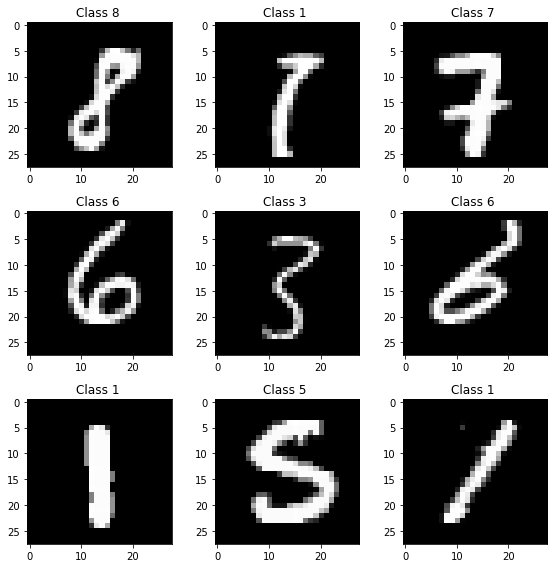

In [3]:
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(X_train))
  plt.imshow(X_train[num],cmap='gray')
  plt.title("Class {} ".format(y_train[num]))


plt.tight_layout()

In [4]:
X_train=X_train.reshape(60000,784)##vektörel hale getirmek
X_test=X_test.reshape(10000,784)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255 ## 0,1 arasında normalize ediyoruz 
X_test/=255

print("train matrix",X_train.shape)
print("test matrix",X_test.shape)

train matrix (60000, 784)
test matrix (10000, 784)


In [5]:
siniflar=10
Y_train=np_utils.to_categorical(y_train,siniflar)
Y_test=np_utils.to_categorical(y_test,siniflar)
print(Y_train[0])
print(y_train[0])
print(Y_test[0])
print(y_test[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7


In [6]:
model=Sequential()
model.add(Dense(256,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(siniflar))
model.add(Activation('softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
__________________________________________________

In [7]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])


In [8]:
history=model.fit(X_train,Y_train,batch_size=128,epochs=30,validation_data=(X_test,Y_test),verbose=1)

Epoch 1/30
469/469 [==============================] - 5s 5ms/step - loss: 0.2828 - accuracy: 0.9162 - val_loss: 0.1230 - val_accuracy: 0.9647
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1040 - accuracy: 0.9680 - val_loss: 0.0868 - val_accuracy: 0.9723
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0701 - accuracy: 0.9785 - val_loss: 0.0746 - val_accuracy: 0.9770
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0496 - accuracy: 0.9837 - val_loss: 0.0730 - val_accuracy: 0.9782
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0368 - accuracy: 0.9884 - val_loss: 0.0741 - val_accuracy: 0.9776
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0294 - accuracy: 0.9905 - val_loss: 0.0699 - val_accuracy: 0.9806
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0247 - accuracy: 0.9919 - val_loss: 0.0783 - val_accuracy: 0.9772
Epoch 

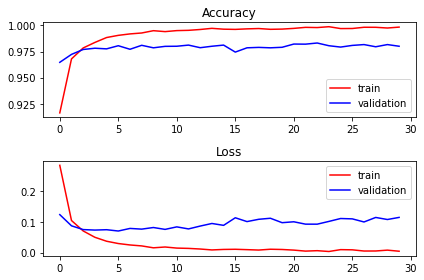

In [9]:
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"],color='r',label='train')
plt.plot(history.history["val_accuracy"],color='b',label='validation')
plt.legend(loc='best')

plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"],color='r',label='train')
plt.plot(history.history["val_loss"],color='b',label='validation')
plt.legend(loc='best')
plt.tight_layout()
plt.show()